# Data Analysis

### The main objective of this analysis is:
**1. Statistical analysis:** 
for the important numerical and categorical features.

**2. The Correlation & Correlation heatmap:** for important numerical feature.

**3. Analysis and visualization around the following quotations:**
1. What is the patient distribution of most important features of New York State during the 2015-year dataset?
2. Calculate average Length of Stay Ratio for top or all if applicable features (APR Severity of Illness Code, APR Risk of Mortality, APR Medical Surgical Description, Payment Typology 1, Emergency Department Indicator, APR MDC Description, Age Group, Gender).
3. What is the relationship between Birth Weight and length of stay?

### About Dataset:
This dataset is about inpatient discharged from hospitals of state of New York provided by the Dept of Health of New York state for the year of 2015.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset.
df = pd.read_csv("../data/processed/cleaned_data.csv")

## Data exploration & understanding

In [3]:
# Geitting Information about the Data
df.info(show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338981 entries, 0 to 2338980
Data columns (total 30 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   health_service_area                  2338981 non-null  object 
 1   hospital_county                      2338981 non-null  object 
 2   operating_certificate_number         2338981 non-null  float64
 3   facility_id                          2338981 non-null  float64
 4   facility_name                        2338981 non-null  object 
 5   age_group                            2338981 non-null  object 
 6   zip_code__3_digits                   2338981 non-null  int64  
 7   gender                               2338981 non-null  object 
 8   race                                 2338981 non-null  object 
 9   ethnicity                            2338981 non-null  object 
 10  length_of_stay                       2338981 non-null  int64  
 11

In [4]:
#checking for missing data
df.isna().sum()

health_service_area                    0
hospital_county                        0
operating_certificate_number           0
facility_id                            0
facility_name                          0
age_group                              0
zip_code__3_digits                     0
gender                                 0
race                                   0
ethnicity                              0
length_of_stay                         0
type_of_admission                      0
patient_disposition                    0
ccs_diagnosis_code                     0
ccs_diagnosis_description              0
ccs_procedure_code                     0
ccs_procedure_description              0
apr_drg_code                           0
apr_drg_description                    0
apr_mdc_code                           0
apr_mdc_description                    0
apr_severity_of_illness_code           0
apr_severity_of_illness_description    0
apr_risk_of_mortality                  0
apr_medical_surg

In [5]:
#checking for duplication in data 
df.duplicated().sum()

7397

In [6]:
# Drop duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
df.duplicated().sum()

0

In [8]:
# veiwing the head of the data the first 5 rows
pd.set_option('display.max_columns', None)  # This will display all columns
df.head()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code__3_digits,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,birth_weight,emergency_department_indicator,total_charges,total_costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,5,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,5620.00,4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,0,Y,7404.18,6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,7931.28,7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,128,Asthma,0,NO PROC,141,Asthma,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,0,Y,11304.44,4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,83,Epilepsy; convulsions,0,NO PROC,53,Seizure,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,Medicaid,0,Y,8330.50,4361.74


In [9]:
# statistcal description for numeric features
round(df.describe(),2)

,operating_certificate_number,facility_id,zip_code__3_digits,length_of_stay,ccs_diagnosis_code,ccs_procedure_code,apr_drg_code,apr_mdc_code,apr_severity_of_illness_code,birth_weight,total_charges,total_costs
count,2331584.00,2331584.00,2331584.00,2331584.00,2331584.00,2331584.00,2331584.00,2331584.00,2331584.00,2331584.00,2331584.00,2331584.00
mean,5001160.12,1041.74,114.62,5.50,190.45,112.53,417.00,10.41,2.02,314.86,43393.74,16050.24
std,2260777.24,713.14,23.17,8.05,160.05,88.89,241.49,5.93,0.90,984.73,80606.97,32455.39
min,101000.00,1.00,5.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.01,0.00
25%,2951001.00,541.00,105.00,2.00,106.00,0.00,199.00,5.00,1.00,0.00,12145.07,4764.31
50%,5907001.00,1099.00,113.00,3.00,157.00,131.00,383.00,9.00,2.00,0.00,23634.00,8841.34
75%,7002009.00,1450.00,125.00,6.00,218.00,216.00,640.00,15.00,3.00,0.00,46819.13,16905.13
max,7004010.00,9431.00,149.00,120.00,917.00,999.00,952.00,25.00,4.00,9900.00,7248390.82,5236614.76


In [10]:
# statistcal description for important numeric features
round(df[['length_of_stay','total_charges','total_costs']].describe(),2)

,length_of_stay,total_charges,total_costs
count,2331584.00,2331584.00,2331584.00
mean,5.50,43393.74,16050.24
std,8.05,80606.97,32455.39
min,1.00,0.01,0.00
25%,2.00,12145.07,4764.31
50%,3.00,23634.00,8841.34
75%,6.00,46819.13,16905.13
max,120.00,7248390.82,5236614.76


In [11]:
# statistcal description for categorical features
df.describe(include="O")

,health_service_area,hospital_county,facility_name,age_group,gender,race,ethnicity,type_of_admission,patient_disposition,ccs_diagnosis_description,ccs_procedure_description,apr_drg_description,apr_mdc_description,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,emergency_department_indicator
count,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584,2331584
unique,8,57,214,5,2,4,4,6,19,263,232,314,25,4,4,2,10,2
top,New York City,Manhattan,Mount Sinai Hospital,50 to 69,F,White,Not Span/Hispanic,Emergency,Home or Self Care,Liveborn,NO PROC,"Neonate birthwt >2499g, normal newborn or neon...",Diseases and Disorders of the Circulatory System,Moderate,Minor,Medical,Medicare,Y
freq,1083178,397939,55005,644707,1297197,1328630,1942895,1484292,1557762,217052,607287,188536,289397,895145,1375309,1766548,875749,1365513


* **First Statistical Description for Numeric Features for the State of New York 2015 Inpatient Discharges:** We are going to focus on important numerical features:

    1. **Length_of_Stay Feature:** Ranges from 1 to 120 days. The mean length of stay is almost 6 days for the entire population, and the median is 3 days. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper values.

    2. **Total_Charges:** Ranges from 0.01 to 7,248,390.82 dollars. The mean is 43,393.74 dollars, and the median is 23,634 dollars. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper values.

    3. **Total_Costs Feature:** Ranges from 0.00 to 5,236,614.76 dollars. The mean is 16,050.24 dollars, and the median is 8,841.34 dollars. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper values.

---

* **Second Statistical Description for Categorical Features:**

    1. **Health_Service_Area Feature:** Out of **8** areas, the most frequented area is **New York City**, which received **1,083,178** patients out of **2,331,584** total patients.

    2. **Hospital_County Feature:** Out of **57** counties, the most frequented county is **Manhattan**, which received **397,939** patients out of the total.

    3. **Facility_Name Feature:** Out of **214** facilities, the most frequented facility is **Mount Sinai Hospital**, which received **55,005** patients out of the total.

    4. **Age_Group Feature:** Out of **5** age groups, the most frequented age group is **50 to 69** years old, with **644,707** patients out of the total.

    5. **Gender Feature:** Out of **2** genders, the most frequented is **Female**, with **1,297,197** female patients out of the total.

    6. **Race Feature:** Out of **4** races, the most frequented is **White**, with **1,328,630** white race patients out of the total.

    7. **Ethnicity Feature:** Out of **4** ethnicities, the most frequented is **Not Hispanic/Spanish**, with **1,328,630** patients out of the total.

    8. **Type_of_Admission Feature:** Out of **6** admission types, the most frequented is admission from **Emergency**, with **1,484,292** patients out of the total.

    9. **Patient_Disposition Feature:** Out of **19** disposition types, the most frequented is **Home or Self Care**, with **1,557,762** patients out of the total.

    10. **CCS_Diagnosis_Description Feature:** Out of **263** diagnosis descriptions, the most frequented is **Liveborn**, with **217,052** patients out of the total.

    11. **CCS_Procedure_Description Feature:** Out of **232** procedure descriptions, the most frequented is **NO PROC**, with **607,287** patients out of the total.

    12. **APR_DRG_Description Feature:** Out of **314** descriptions, the most frequented is "**Neonate birthweight >2499g, normal newborn or neonate...**" with **188,536** patients out of the total.

    13. **APR_MDC_Description Feature:** Out of **25** descriptions, the most frequented is "**Diseases and Disorders of the Circulatory System**" with **289,397** patients out of the total.

    14. **APR_Severity_of_Illness_Description Feature:** Out of **4** descriptions, the most frequented is **Moderate**, with **895,145** patients out of the total.

    15. **APR_Risk_of_Mortality Feature:** Out of **4** descriptions, the most frequented is **Minor**, with **1,375,309** patients out of the total.

    16. **APR_Medical_Surgical_Description Feature:** Out of **2** descriptions, the most frequented is **Medical**, with **1,766,548** patients out of the total.

    17. **Payment_Typology_1 Feature:** Out of **10** descriptions, the most frequented is **Medicare**, with **875,749** patients out of the total.

    18. **Emergency_Department_Indicator Feature:** Out of **2** descriptions, the most frequented is **Y**, with **1,365,513** patients out of the total.


## Correlation heatmap

In [12]:
# The Correlation show the relationship between each feature and Length_of_Stay Feature.
corr_mat = df.corr()['length_of_stay'].sort_values(ascending=False)
corr_mat

length_of_stay                  1.000000
total_charges                   0.705492
total_costs                     0.681241
apr_severity_of_illness_code    0.345417
ccs_diagnosis_code              0.112657
apr_mdc_code                    0.103640
apr_drg_code                    0.075539
ccs_procedure_code              0.043305
operating_certificate_number    0.020755
facility_id                     0.005646
zip_code__3_digits             -0.012444
birth_weight                   -0.059742
Name: length_of_stay, dtype: float64

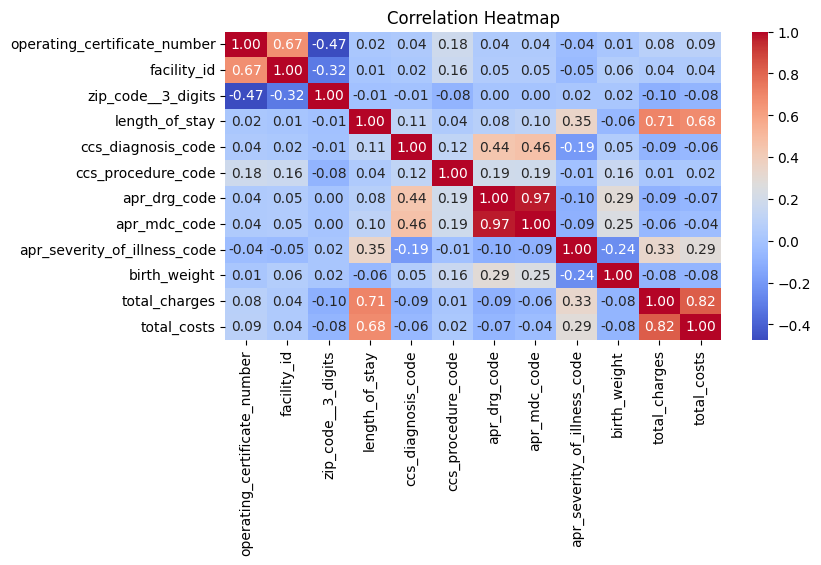

In [13]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Although the correlation matrix may not provide meaningful insights for all columns, it is evident that the APR Severity of Illness Code shows a strong positive correlation with the length of stay, as do total charges and total costs. Additionally, CCS Diagnosis code appears to have a slight positive correlation with the length of stay. Positive correlations can also be observed in the dataset between features such as CCS Diagnosis codes and APR DRG codes.

## Univariant analysis

In [14]:
df.head()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code__3_digits,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,ccs_diagnosis_code,ccs_diagnosis_description,ccs_procedure_code,ccs_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,birth_weight,emergency_department_indicator,total_charges,total_costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,5,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,5620.00,4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,0,Y,7404.18,6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,8,Emergency,Home or Self Care,657,Mood disorders,0,NO PROC,753,Bipolar disorders,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,0,Y,7931.28,7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,128,Asthma,0,NO PROC,141,Asthma,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,0,Y,11304.44,4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,83,Epilepsy; convulsions,0,NO PROC,53,Seizure,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,Medicaid,0,Y,8330.50,4361.74


In [15]:
# 1\ What is the distribution percent of patient among cities of New York State during the 2015 year?
area_distribution = round(df.health_service_area.value_counts()/len(df)*100,2)
area_distribution

New York City     46.46
Long Island       14.50
Hudson Valley     10.51
Capital/Adiron     7.17
Western NY         7.02
Central NY         6.77
Finger Lakes       6.28
Southern Tier      1.29
Name: health_service_area, dtype: float64

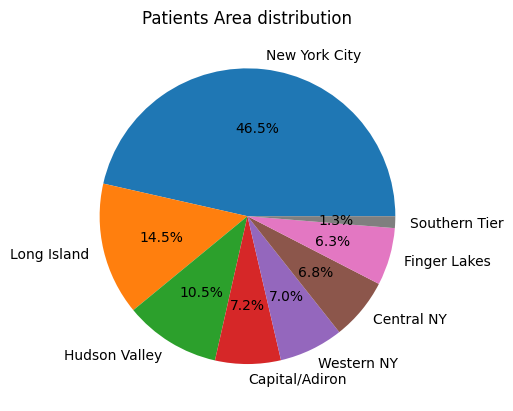

In [16]:
# pie chart show the percentage of patients area distribution
plt.pie(area_distribution, labels=area_distribution.index, autopct='%1.1f%%')
plt.title('Patients Area distribution')
plt.show()

In [17]:
# 2\ What is the Percent share of top 10 Hospital County?
county_dist = round(df.hospital_county.value_counts().sort_values(ascending=False).head(10)/len(df)*100,2)
county_dist

Manhattan      17.07
Kings          10.58
Queens          8.38
Bronx           7.99
Nassau          7.75
Suffolk         6.75
Erie            5.16
Westchester     5.11
Monroe          4.51
Onondaga        3.35
Name: hospital_county, dtype: float64

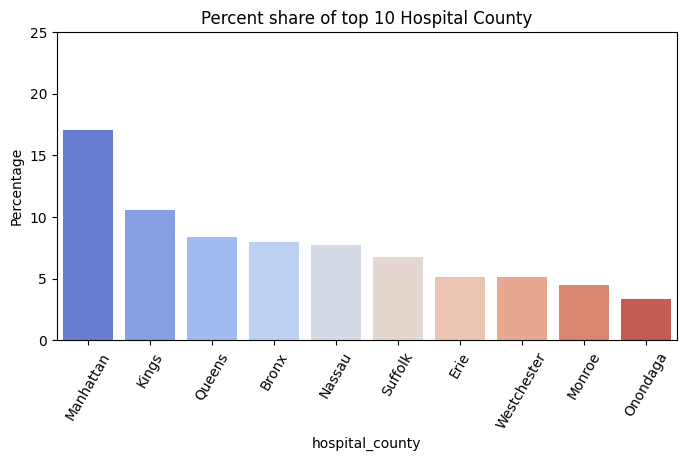

In [18]:
# Barplot chart Reflect the Percent share of top 10 Hospital County
plt.figure(figsize=(8, 4))
sns.barplot(x=county_dist.index, y=county_dist.values, palette='coolwarm')
plt.xlabel('hospital_county')
plt.xticks(rotation=60)
plt.yticks(range(0,30,5))
plt.ylabel('Percentage')
plt.title('Percent share of top 10 Hospital County')
plt.show()

In [19]:
# 3\ what is the top 10 hospital received patient during year 2015 ?
top_facilities = df.facility_name.value_counts().nlargest(10)
top_facilities

Mount Sinai Hospital                                              55005
North Shore University Hospital                                   47463
New York Presbyterian Hospital - Columbia Presbyterian Center     47399
New York Presbyterian Hospital - New York Weill Cornell Center    42724
Montefiore Medical Center - Henry & Lucy Moses Div                42715
Maimonides Medical Center                                         41466
Long Island Jewish Medical Center                                 40850
New York Methodist Hospital                                       39925
Strong Memorial Hospital                                          38653
Albany Medical Center Hospital                                    36289
Name: facility_name, dtype: int64

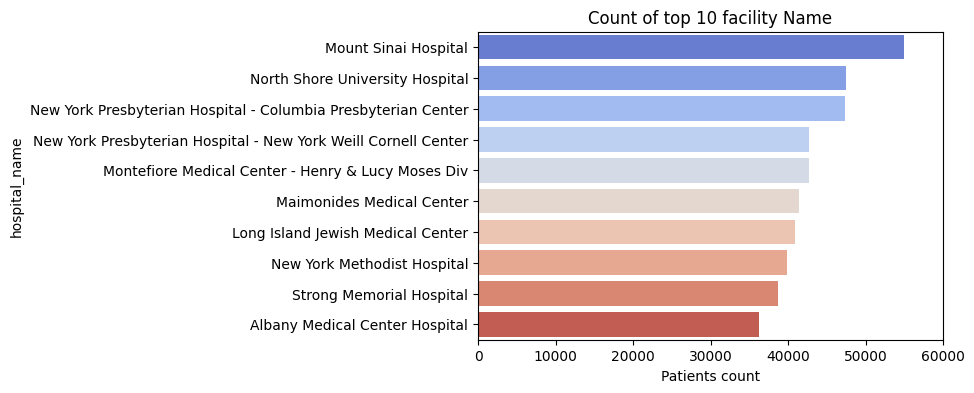

In [20]:
# Barplot chart Reflect the count of top 10 Hospital name received patients.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_facilities.index, x=top_facilities.values, palette='coolwarm')
plt.ylabel('hospital_name')
plt.xticks(range(0,70000,10000))
plt.xlabel('Patients count')
plt.title('Count of top 10 facility Name')
plt.show()

In [21]:
# 4\ What is the distribution percent of age range of patient during the 2015 year?
age_dist = round(df.age_group.value_counts()/len(df)*100,2)
age_dist

50 to 69       27.65
70 or Older    27.58
30 to 49       19.56
0 to 17        14.68
18 to 29       10.53
Name: age_group, dtype: float64

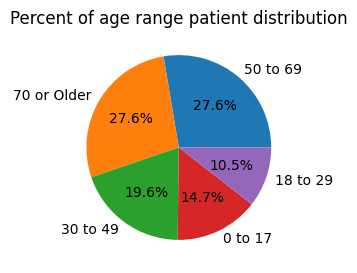

In [22]:
# pie chart show the percentage of patients in relation to age range
plt.figure(figsize=(6, 3))
plt.pie(age_dist, labels=age_dist.index, autopct='%1.1f%%')
plt.title('Percent of age range patient distribution')
plt.show()

In [23]:
# 5\ What is the percent of gender distribution among patient?
gender_dist = round(df.gender.value_counts()/len(df)*100,2)
gender_dist

F    55.64
M    44.36
Name: gender, dtype: float64

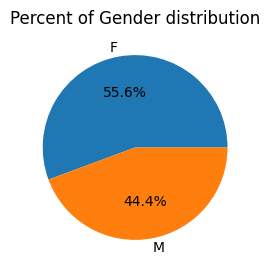

In [24]:
# pie chart show the percentage of patients in relation to age range
plt.figure(figsize=(6, 3))
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%')
plt.title('Percent of Gender distribution')
plt.show()

In [25]:
# 6\ What is the distribution percent of ethnicities among patients?
ethnic_dist = round(df.ethnicity.value_counts()/len(df)*100,2)
ethnic_dist

Not Span/Hispanic    83.33
Spanish/Hispanic     11.83
Unknown               4.47
Multi-ethnic          0.37
Name: ethnicity, dtype: float64

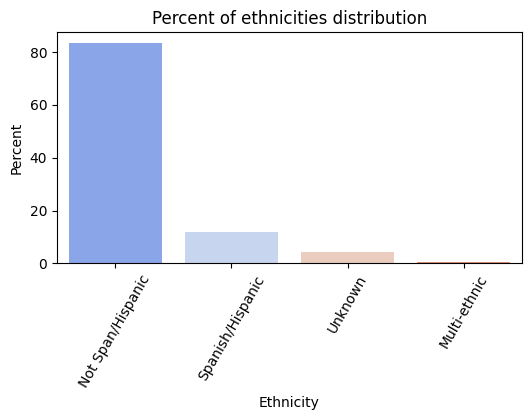

In [26]:
# Barplot chart Reflect the distribution of ethnicities among patients 
plt.figure(figsize=(6, 3))
sns.barplot(x=ethnic_dist.index, y=ethnic_dist.values, palette='coolwarm')
plt.xlabel('Ethnicity')
plt.xticks(rotation=60)
plt.ylabel('Percent')
plt.title('Percent of ethnicities distribution')
plt.show()

In [27]:
# 7\ What is the distribution percent of type of admission among patients? 
admi_dist = round(df.type_of_admission.value_counts()/len(df)*100,2)
admi_dist

Emergency        63.66
Elective         19.14
Newborn           9.32
Urgent            7.56
Trauma            0.27
Not Available     0.05
Name: type_of_admission, dtype: float64

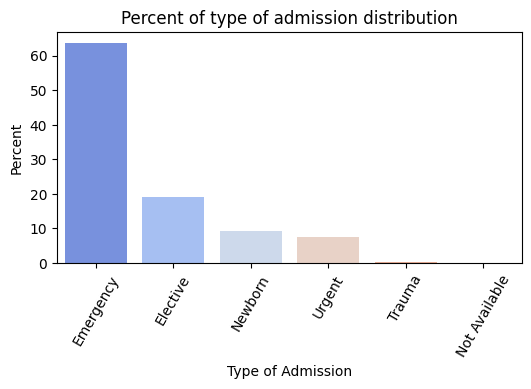

In [28]:
# Barplot chart Reflect the distribution of type of admission among patients 
plt.figure(figsize=(6, 3))
sns.barplot(x=admi_dist.index, y=admi_dist.values, palette='coolwarm')
plt.xlabel('Type of Admission')
plt.xticks(rotation=60)
plt.ylabel('Percent')
plt.title('Percent of type of admission distribution')
plt.show()

In [29]:
# 8\ What is the top 5 diagnosis description among patient and what is the percent of each one represents?
diag_dist = round(df.ccs_diagnosis_description.value_counts().nlargest(5)/len(df)*100,2)
diag_dist

Liveborn                                     9.31
Septicemia (except in labor)                 4.66
Osteoarthritis                               2.72
Congestive heart failure; nonhypertensive    2.52
Mood disorders                               2.44
Name: ccs_diagnosis_description, dtype: float64

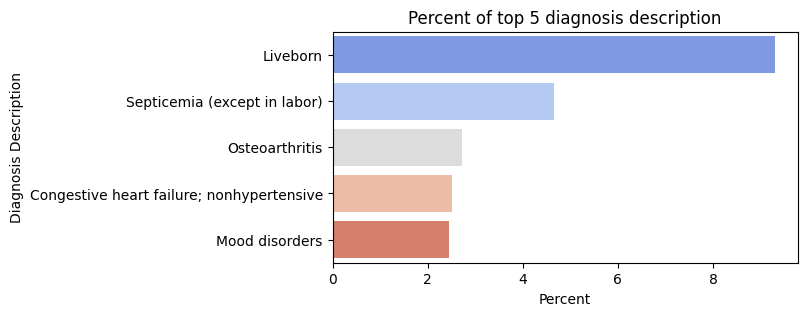

In [30]:
# Barplot chart Reflect the top 5 diagnosis description among patient
plt.figure(figsize=(6, 3))
sns.barplot(y=diag_dist.index, x=diag_dist.values, palette='coolwarm')
plt.ylabel('Diagnosis Description')
plt.xlabel('Percent')
plt.title('Percent of top 5 diagnosis description')
plt.show()

In [31]:
# 9\ What is the top 5 procedure description among patient and what is the percent of each one represents?
prec_dis = round(df.ccs_procedure_description.value_counts().nlargest(5)/len(df)*100,2)
prec_dis 

NO PROC                    26.05
OTHER THERAPEUTIC PRCS      7.51
OT PRCS TO ASSIST DELIV     3.56
PROPHYLACTIC VAC/INOCUL     3.28
CESAREAN SECTION            3.20
Name: ccs_procedure_description, dtype: float64

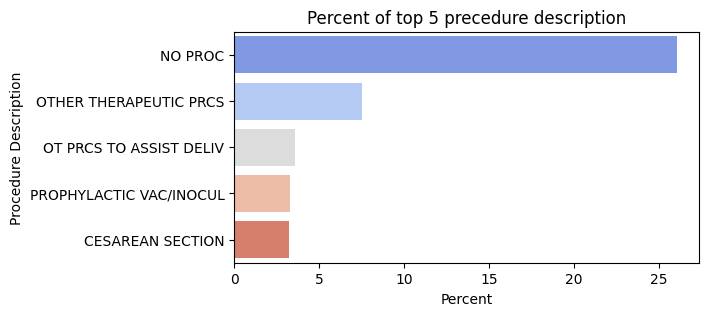

In [32]:
# Barplot chart Reflect the top 5 procedure description among patient
plt.figure(figsize=(6, 3))
sns.barplot(y=prec_dis.index, x=prec_dis.values, palette='coolwarm')
plt.ylabel('Procedure Description')
plt.xlabel('Percent')
plt.title('Percent of top 5 precedure description')
plt.show()

In [33]:
# 10\ What is the top 5 apr_drg_description among patient and what is the percent of each one represents?
drg_dist = round(df.apr_drg_description.value_counts().nlargest(5)/len(df)*100,2)
drg_dist

Neonate birthwt >2499g, normal newborn or neonate w other problem    8.09
Vaginal delivery                                                     6.27
Septicemia & disseminated infections                                 4.07
Cesarean delivery                                                    3.25
Heart failure                                                        2.42
Name: apr_drg_description, dtype: float64

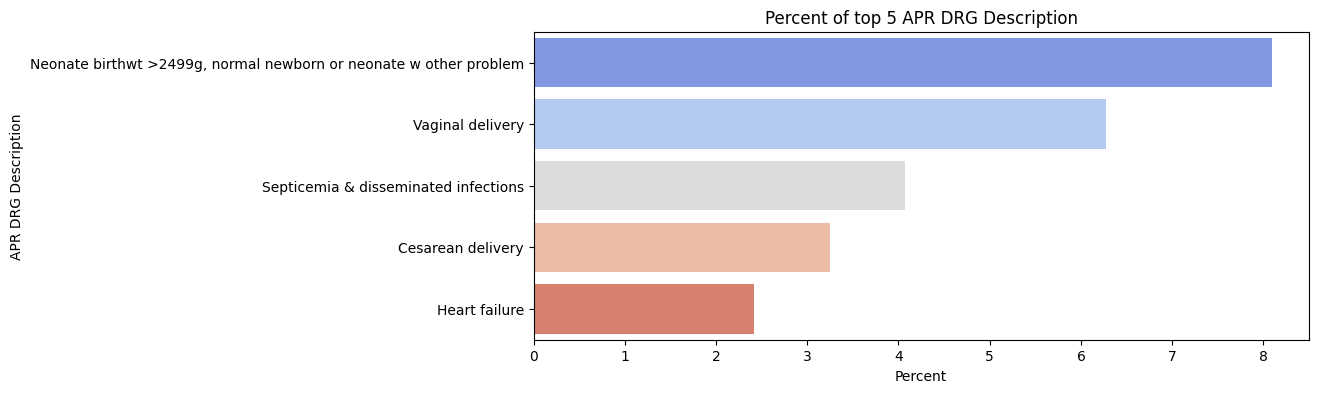

In [34]:
# Barplot chart Reflect the top 5 apr_drg_description among patient
plt.figure(figsize=(10, 4))
sns.barplot(y=drg_dist.index, x=drg_dist.values, palette='coolwarm')
plt.ylabel('APR DRG Description')
plt.xlabel('Percent')
plt.title('Percent of top 5 APR DRG Description')
plt.show()

In [35]:
# 11\ What is the top 5 apr_mdc_description among patient and what is the percent of each one represents?
mdc_dist = round(df.apr_mdc_description.value_counts().nlargest(5)/len(df)*100,1)
mdc_dist

Diseases and Disorders of the Circulatory System                                   12.4
Pregnancy, Childbirth and the Puerperium                                           10.7
Newborns and Other Neonates with Conditions Originating in the Perinatal Period     9.5
Diseases and Disorders of the Musculoskeletal System and Conn Tissue                8.8
Diseases and Disorders of the Digestive System                                      8.5
Name: apr_mdc_description, dtype: float64

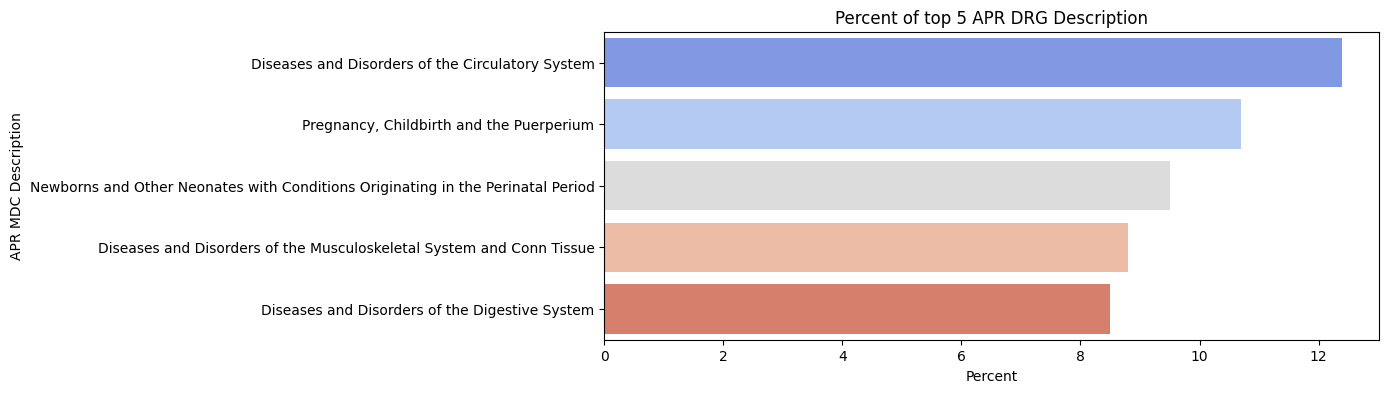

In [36]:
# Barplot chart Reflect the top 5 apr_mdc_description among patient
plt.figure(figsize=(10, 4))
sns.barplot(y=mdc_dist.index, x=mdc_dist.values, palette='coolwarm')
plt.ylabel('APR MDC Description')
plt.xlabel('Percent')
plt.title('Percent of top 5 APR DRG Description')
plt.show()

In [37]:
# 12\ What is the percent of apr_severity_of_illness_description among patient?
seve_of_ill = round(df.apr_severity_of_illness_description.value_counts()/len(df)*100,2)
seve_of_ill

Moderate    38.39
Minor       33.17
Major       22.15
Extreme      6.29
Name: apr_severity_of_illness_description, dtype: float64

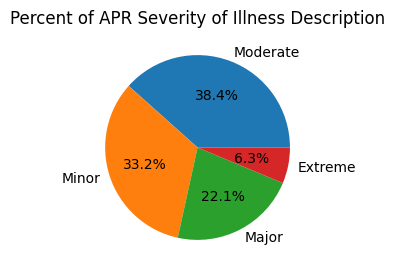

In [38]:
# pie chart show the percent of apr_severity_of_illness_description among patient
plt.figure(figsize=(6, 3))
plt.pie(seve_of_ill, labels=seve_of_ill.index, autopct='%1.1f%%')
plt.title('Percent of APR Severity of Illness Description')
plt.show()

In [39]:
# 13\ What is the percent of payment_typology_1 among patients?
pay_typ = round(df.payment_typology_1.value_counts()/len(df)*100,2)
pay_typ

Medicare                     37.56
Medicaid                     30.36
Private Health Insurance     14.22
Blue Cross/Blue Shield       11.75
Self-Pay                      2.89
Miscellaneous/Other           1.24
Managed Care, Unspecified     0.98
Federal/State/Local/VA        0.53
Unknown                       0.27
Department of Corrections     0.19
Name: payment_typology_1, dtype: float64

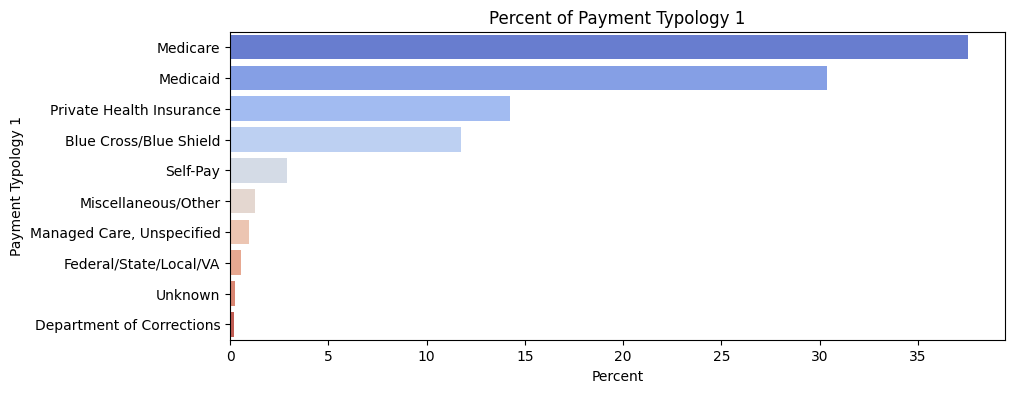

In [40]:
# Barplot chart Reflect the percent of payment_typology_1 among patient
plt.figure(figsize=(10, 4))
sns.barplot(y=pay_typ.index, x=pay_typ.values, palette='coolwarm')
plt.ylabel('Payment Typology 1')
plt.xlabel('Percent')
plt.title('Percent of Payment Typology 1')
plt.show()

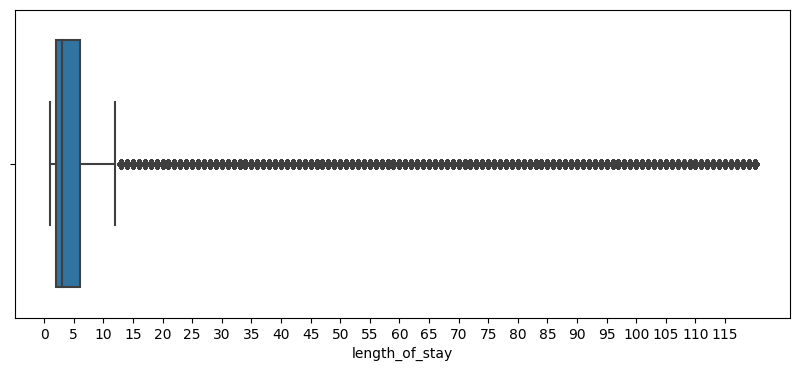

In [41]:
# boxplot for Length of stay feature
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x = 'length_of_stay')
plt.xticks(range(0,120,5))
plt.show()

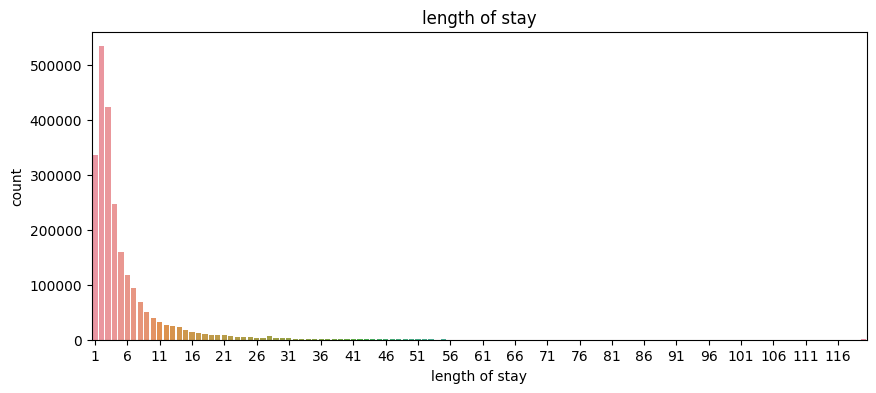

In [42]:
# count plot for Length of stay feature
plt.figure(figsize=(10, 4))
sns.countplot(data = df, x = 'length_of_stay')
plt.xticks(range(0,120,5))
plt.ylabel('count')
plt.xlabel('length of stay')
plt.title('length of stay')
plt.show()

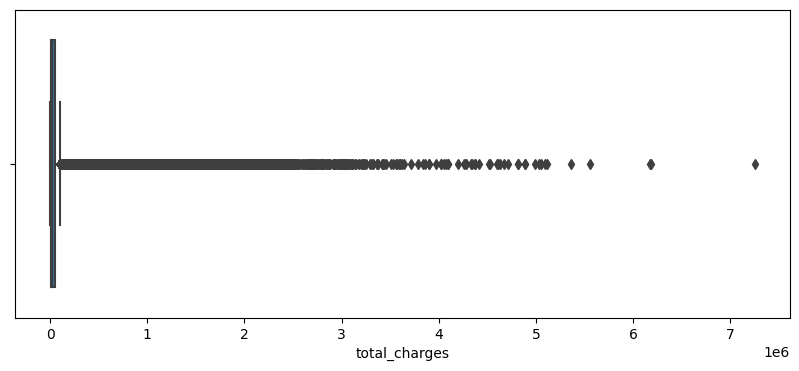

In [43]:
# boxplot for total_charges feature
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x = 'total_charges')
plt.show()

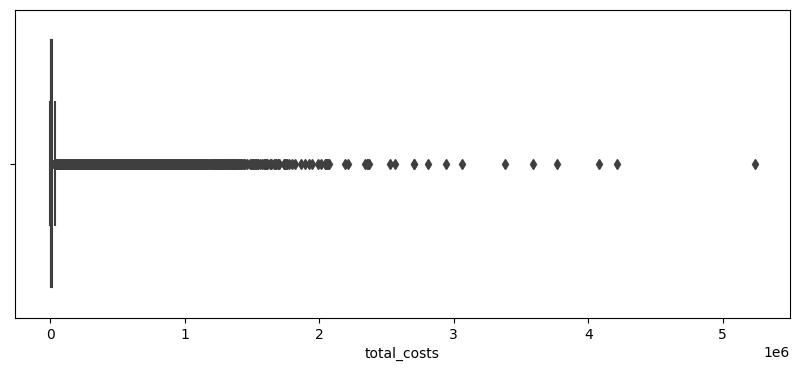

In [44]:
# boxplot for total_costs feature
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x = 'total_costs')
plt.show()

## Bivariate analysis

In [45]:
# 14\ Calculate average length_of_stay Ratio for apr_severity_of_illness_description
avg_stay_by_sev_of_ill = round(df.groupby('apr_severity_of_illness_description')['length_of_stay'].mean().sort_values(ascending=False),2)
avg_stay_by_sev_of_ill

apr_severity_of_illness_description
Extreme     15.75
Major        7.33
Moderate     4.83
Minor        3.09
Name: length_of_stay, dtype: float64

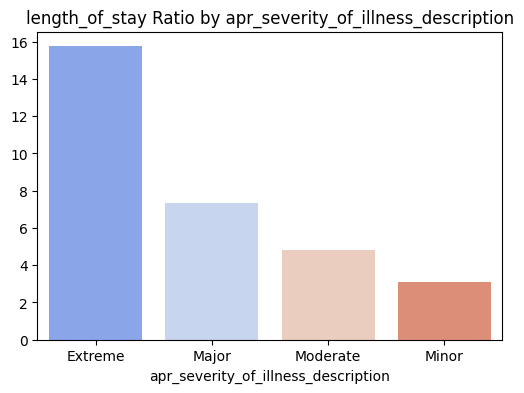

In [46]:
# Bar plot to visualize average length_of_stay Ratio by apr_severity_of_illness_description
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_stay_by_sev_of_ill.index, y=avg_stay_by_sev_of_ill.values, data=df, palette='coolwarm')
plt.title('length_of_stay Ratio by apr_severity_of_illness_description')
plt.show()

* from the above it is clear that as more as the severity of illness there is increase in the length of stay days which is logical.

In [47]:
# 15\ Calculate average length_of_stay Ratio for apr_risk_of_mortality?
avg_stay_by_risk_of_mort = round(df.groupby('apr_risk_of_mortality')['length_of_stay'].mean().sort_values(ascending=False),2)
avg_stay_by_risk_of_mort

apr_risk_of_mortality
Extreme     14.20
Major        8.28
Moderate     5.56
Minor        4.02
Name: length_of_stay, dtype: float64

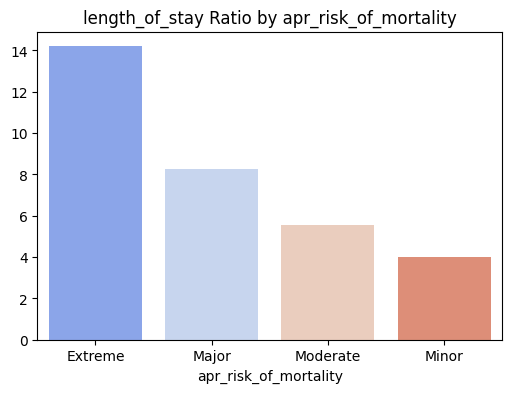

In [48]:
# Bar plot to visualize average length_of_stay Ratio by apr_risk_of_mortality
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_stay_by_risk_of_mort.index, y=avg_stay_by_risk_of_mort.values, data=df, palette='coolwarm')
plt.title('length_of_stay Ratio by apr_risk_of_mortality')
plt.show()

* from the above it is clear that as more risk of motality there is increse in the length of stay days which is logical.

In [49]:
# 16\ Calculate average length_of_stay Ratio for apr_medical_surgical_description?
avg_stay_by_medic_surg_dis = round(df.groupby('apr_medical_surgical_description')['length_of_stay'].mean().sort_values(ascending=False),2)
avg_stay_by_medic_surg_dis

apr_medical_surgical_description
Surgical    5.99
Medical     5.34
Name: length_of_stay, dtype: float64

* From the above both medical and surgical description have almost the same effect on length of stay.

In [50]:
# 17\ Calculate average length_of_stay Ratio for payment_typology_1?
avg_pay_top_1 = round(df.groupby('payment_typology_1')['length_of_stay'].mean().sort_values(ascending=False),2)
avg_pay_top_1

payment_typology_1
Department of Corrections    8.33
Medicare                     6.59
Unknown                      5.81
Miscellaneous/Other          5.61
Medicaid                     5.29
Self-Pay                     4.98
Managed Care, Unspecified    4.41
Federal/State/Local/VA       4.35
Private Health Insurance     4.31
Blue Cross/Blue Shield       4.17
Name: length_of_stay, dtype: float64

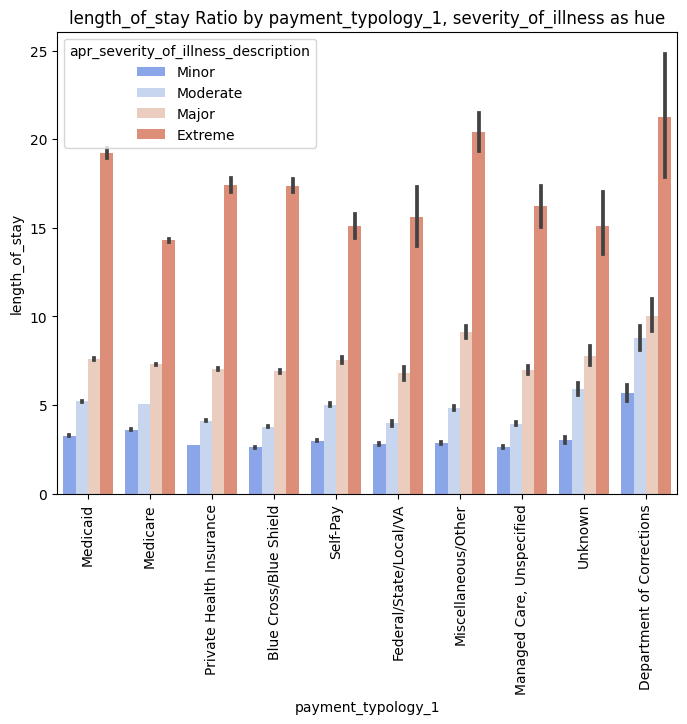

In [51]:
# Bar plot to visualize average length_of_stay Ratio by payment_typology_1 the hue is by severity_of_illness
plt.figure(figsize=(8, 6))
sns.barplot(x='payment_typology_1', y='length_of_stay', hue='apr_severity_of_illness_description', data=df, palette='coolwarm')
plt.title('length_of_stay Ratio by payment_typology_1, severity_of_illness as hue')
plt.xticks(rotation=90)
plt.show()

* Although the percentage of payment_typology_1 among patients shows that Medicare has the highest percentage, almost 38%, while Department of Corrections has the lowest percentage, at 0.19%.

* The above-average length_of_stay ratio for payment_typology_1 shows that the highest mean length of stay is for Department of Corrections, with an average of more than 8 days, approximately two days longer than Medicare.

* When investigating this contradiction further by looking at the length_of_stay ratio by payment_typology_1 and severity_of_illness as a hue, it becomes apparent that all severity_of_illness types are much more frequent in Department of Corrections than in other payment_typology_1 types. This may be one of the main reasons that could justify the contradiction, as severity_of_illness has a positive correlation with the length of stay.


In [52]:
df.birth_weight.value_counts().mean()

25621.802197802197

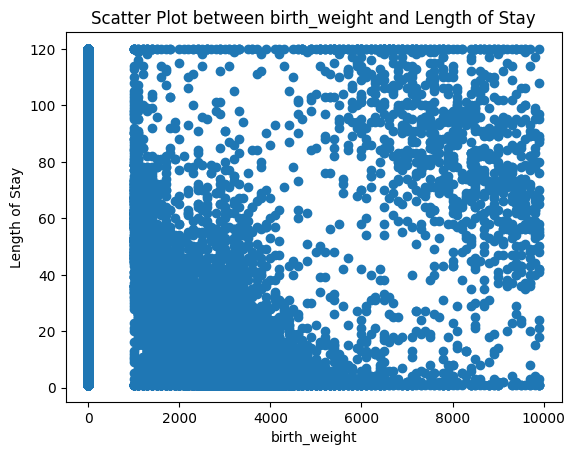

In [53]:
# 18\ What is the releation ship between between birth weight and length of stay? 
# Scatter plot show the relation between birth weight and length of stay
plt.scatter(df['birth_weight'], df['length_of_stay'])
plt.xlabel('birth_weight')
plt.ylabel('Length of Stay')
plt.title('Scatter Plot between birth_weight and Length of Stay')
plt.show()

* From the correlation heatmap, it appears that there is a negative correlation between birth weight and length of stay.

* Additionally, the scatter plot illustrates that as birth weight decreases, the data becomes more skewed and condensed to the left.


In [54]:
# 19\ What is the effect of emergency_department_indicator on length_of_stay ratio ?
df.emergency_department_indicator.value_counts()

Y    1365513
N     966071
Name: emergency_department_indicator, dtype: int64

In [55]:
avg_emrg_dep_indic = round(df.groupby('emergency_department_indicator')['length_of_stay'].mean(),2)
avg_emrg_dep_indic

emergency_department_indicator
N    5.03
Y    5.82
Name: length_of_stay, dtype: float64

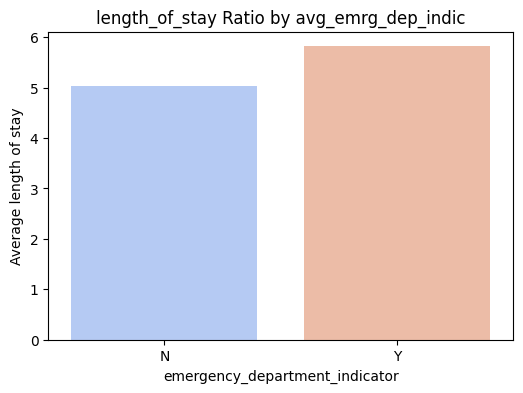

In [56]:
# Bar plot to visualize average length_of_stay Ratio by emergency_department_indicator
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_emrg_dep_indic.index, y=avg_emrg_dep_indic.values, data=df, palette='coolwarm')
plt.title('length_of_stay Ratio by avg_emrg_dep_indic')
plt.ylabel('Average length of stay')
plt.show()

* From the above the emergency_department_indicator of type Y (yes) have more average length of stay by almost 1 day more.

In [57]:
df.apr_mdc_description.value_counts()

Diseases and Disorders of the Circulatory System                                                        289397
Pregnancy, Childbirth and the Puerperium                                                                250341
Newborns and Other Neonates with Conditions Originating in the Perinatal Period                         222107
Diseases and Disorders of the Musculoskeletal System and Conn Tissue                                    204534
Diseases and Disorders of the Digestive System                                                          197527
Diseases and Disorders of the Respiratory System                                                        196004
Diseases and Disorders of the Nervous System                                                            141733
Infectious and Parasitic Diseases, Systemic or Unspecified Sites                                        130885
Mental Diseases and Disorders                                                                           116112
D

In [58]:
# 20\ Calculate average length_of_stay Ratio for apr_mdc_description?
avg_apr_mdc_desc = round(df.groupby('apr_mdc_description')['length_of_stay'].mean().sort_values(ascending=False),2)
avg_apr_mdc_desc 

apr_mdc_description
Mental Diseases and Disorders                                                                           12.41
Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts    10.96
Multiple Significant Trauma                                                                             10.68
Lymphatic, Hematopoietic, Other Malignancies, Chemotherapy and Radiotherapy                              9.86
Infectious and Parasitic Diseases, Systemic or Unspecified Sites                                         8.75
Human Immunodeficiency Virus Infections                                                                  8.72
Burns                                                                                                    8.22
Alcohol/Drug Use and Alcohol/Drug Induced Organic Mental Disorders                                       6.31
Diseases and Disorders of the Nervous System                                                        

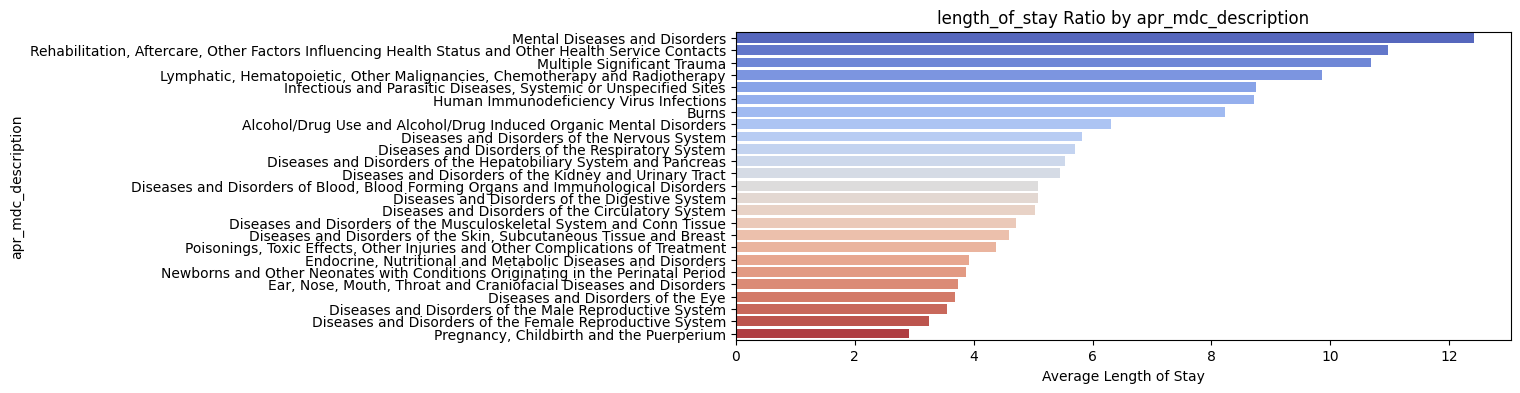

In [59]:
# Bar plot to visualize average length_of_stay Ratio by apr_mdc_description
plt.figure(figsize=(10, 4))
sns.barplot(y=avg_apr_mdc_desc.index, x=avg_apr_mdc_desc.values, palette='coolwarm')
plt.ylabel('apr_mdc_description')
plt.xlabel('Average Length of Stay')
plt.title('length_of_stay Ratio by apr_mdc_description')
plt.show()

* From the above the highest length_of_stay Ratio by apr_mdc_description is (Mental Diseases and Disorders) by average of a above 12 dayes as length of stay. 

In [60]:
# 21\ Calculate average length_of_stay Ratio for age_group?
avg_age_group = round(df.groupby('age_group')['length_of_stay'].mean().sort_values(ascending=False),2)
avg_age_group 

age_group
70 or Older    6.44
50 to 69       6.10
30 to 49       4.88
18 to 29       4.58
0 to 17        4.06
Name: length_of_stay, dtype: float64

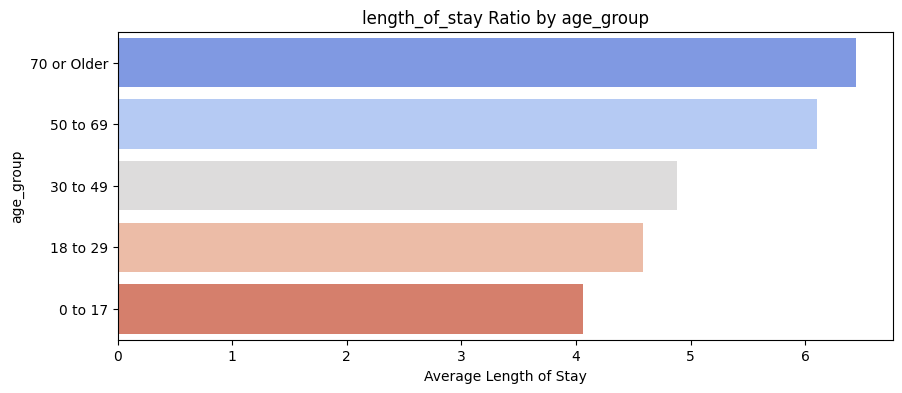

In [61]:
# Bar plot to visualize average length_of_stay Ratio by age_group
plt.figure(figsize=(10, 4))
sns.barplot(y=avg_age_group.index, x=avg_age_group.values, palette='coolwarm')
plt.ylabel('age_group')
plt.xlabel('Average Length of Stay')
plt.title('length_of_stay Ratio by age_group')
plt.show()

* From the above we found that younger age group tend to have less Average length of stay days than older age group.

In [62]:
# 22\ Calculate average length_of_stay Ratio for gender?
avg_gender = round(df.groupby('gender')['length_of_stay'].mean().sort_values(ascending=False),2)
avg_gender 

gender
M    5.97
F    5.12
Name: length_of_stay, dtype: float64

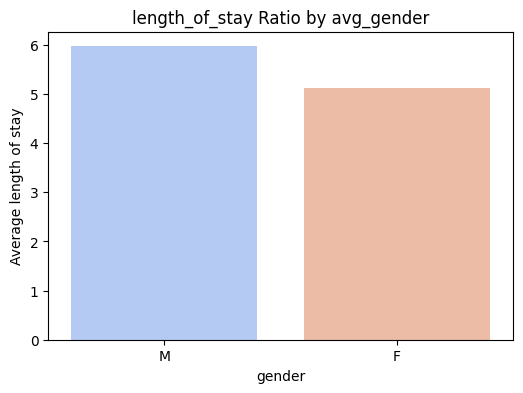

In [63]:
# Bar plot to visualize average length_of_stay Ratio by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_gender.index, y=avg_gender.values, data=df, palette='coolwarm')
plt.title('length_of_stay Ratio by avg_gender')
plt.ylabel('Average length of stay')
plt.show()

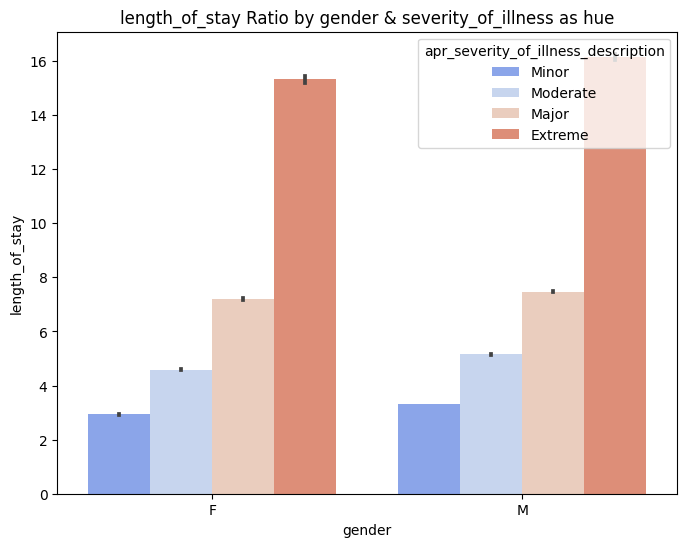

In [64]:
# Bar plot to visualize average length_of_stay Ratio by gender the hue is by severity_of_illness
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='length_of_stay', hue='apr_severity_of_illness_description', data=df, palette='coolwarm')
plt.title('length_of_stay Ratio by gender & severity_of_illness as hue')
legend_font=2
aspect=1.5
plt.show()

* Although, the Female represent 55% of total patient they show less average lenth of stay days. 
* When investigating this contradiction further by looking at the length_of_stay ratio gender and severity_of_illness as a hue, it becomes apparent that all severity_of_illness types are higher in frequent in Male than in Female gender type. This may be one of the main reasons that could justify the contradiction, as severity_of_illness has a positive correlation with the length of stay.

# Analysis outcomes or summary:


### The main objective of this analysis is:
**1. Statistical analysis:** 
for the important numerical and categorical features.

**2. The Correlation & Correlation heatmap:** for important numerical feature.

**3. Analysis and visualization around the following quotations:**
1. What is the patient distribution of most important features of New York State during the 2015-year dataset?
2. Calculate average Length of Stay Ratio for top or all if applicable features (APR Severity of Illness Code, APR Risk of Mortality, APR Medical Surgical Description, Payment Typology 1, Emergency Department Indicator, APR MDC Description, Age Group, Gender).
3. What is the relationship between Birth Weight and length of stay?
------
**1. Statistical analysis outcomes:** 
for the important numerical and categorical features.
* **First Statistical Description for Numeric Features for the State of New York 2015 Inpatient Discharges:** We are going to focus on important numerical features:

    1. **Length_of_Stay Feature:** Ranges from 1 to 120 days. The mean length of stay is almost 6 days for the entire population, and the median is 3 days. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper values.

    2. **Total_Charges:** Ranges from 0.01 to 7,248,390.82 dollars. The mean is 43,393.74 dollars, and the median is 23,634 dollars. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper values.

    3. **Total_Costs Feature:** Ranges from 0.00 to 5,236,614.76 dollars. The mean is 16,050.24 dollars, and the median is 8,841.34 dollars. As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper values.

---

* **Second Statistical Description for Categorical Features:**

    1. **Health_Service_Area Feature:** Out of **8** areas, the most frequented area is **New York City**, which received **1,083,178** patients out of **2,331,584** total patients.

    2. **Hospital_County Feature:** Out of **57** counties, the most frequented county is **Manhattan**, which received **397,939** patients out of the total.

    3. **Facility_Name Feature:** Out of **214** facilities, the most frequented facility is **Mount Sinai Hospital**, which received **55,005** patients out of the total.

    4. **Age_Group Feature:** Out of **5** age groups, the most frequented age group is **50 to 69** years old, with **644,707** patients out of the total.

    5. **Gender Feature:** Out of **2** genders, the most frequented is **Female**, with **1,297,197** female patients out of the total.

    6. **Race Feature:** Out of **4** races, the most frequented is **White**, with **1,328,630** white race patients out of the total.

    7. **Ethnicity Feature:** Out of **4** ethnicities, the most frequented is **Not Hispanic/Spanish**, with **1,328,630** patients out of the total.

    8. **Type_of_Admission Feature:** Out of **6** admission types, the most frequented is admission from **Emergency**, with **1,484,292** patients out of the total.

    9. **Patient_Disposition Feature:** Out of **19** disposition types, the most frequented is **Home or Self Care**, with **1,557,762** patients out of the total.

    10. **CCS_Diagnosis_Description Feature:** Out of **263** diagnosis descriptions, the most frequented is **Liveborn**, with **217,052** patients out of the total.

    11. **CCS_Procedure_Description Feature:** Out of **232** procedure descriptions, the most frequented is **NO PROC**, with **607,287** patients out of the total.

    12. **APR_DRG_Description Feature:** Out of **314** descriptions, the most frequented is "**Neonate birthweight >2499g, normal newborn or neonate...**" with **188,536** patients out of the total.

    13. **APR_MDC_Description Feature:** Out of **25** descriptions, the most frequented is "**Diseases and Disorders of the Circulatory System**" with **289,397** patients out of the total.

    14. **APR_Severity_of_Illness_Description Feature:** Out of **4** descriptions, the most frequented is **Moderate**, with **895,145** patients out of the total.

    15. **APR_Risk_of_Mortality Feature:** Out of **4** descriptions, the most frequented is **Minor**, with **1,375,309** patients out of the total.

    16. **APR_Medical_Surgical_Description Feature:** Out of **2** descriptions, the most frequented is **Medical**, with **1,766,548** patients out of the total.

    17. **Payment_Typology_1 Feature:** Out of **10** descriptions, the most frequented is **Medicare**, with **875,749** patients out of the total.

    18. **Emergency_Department_Indicator Feature:** Out of **2** descriptions, the most frequented is **Y**, with **1,365,513** patients out of the total.
    
---
**2. The Correlation & Correlation heatmap outcomes:** for important numerical feature.

Although the correlation matrix may not provide meaningful insights for all columns, it is evident that the APR Severity of Illness Code shows a strong positive correlation with the length of stay, as do total charges and total costs. Additionally, CCS Diagnosis code appears to have a slight positive correlation with the length of stay. Positive correlations can also be observed in the dataset between features such as CCS Diagnosis codes and APR DRG codes.

---
**3. Analysis and Visualization Outcomes:**

1. What is the distribution percentage of patients among cities of New York State during the year 2015?
   - New York City: 46.46%
   - Long Island: 14.50%
   - Hudson Valley: 10.51%
   - Capital/Adirondack: 7.17%
   - Western NY: 7.02%
   - Central NY: 6.77%
   - Finger Lakes: 6.28%
   - Southern Tier: 1.29%

2. What is the percent share of the top 10 Hospital Counties?
   - Manhattan: 17.07%
   - Kings: 10.58%
   - Queens: 8.38%
   - Bronx: 7.99%
   - Nassau: 7.75%
   - Suffolk: 6.75%
   - Erie: 5.16%
   - Westchester: 5.11%
   - Monroe: 4.51%
   - Onondaga: 3.35%

3. What are the top 10 hospitals that received patients during the year 2015?
   - Mount Sinai Hospital: 55005
   - North Shore University Hospital: 47463
   - New York Presbyterian Hospital - Columbia Presbyterian Center: 47399
   - New York Presbyterian Hospital - New York Weill Cornell Center: 42724
   - Montefiore Medical Center - Henry & Lucy Moses Div: 42715
   - Maimonides Medical Center: 41466
   - Long Island Jewish Medical Center: 40850
   - New York Methodist Hospital: 39925
   - Strong Memorial Hospital: 38653
   - Albany Medical Center Hospital: 36289

4. What is the distribution percentage of age groups among patients during the year 2015?
   - 50 to 69: 27.65%
   - 70 or Older: 27.58%
   - 30 to 49: 19.56%
   - 0 to 17: 14.68%
   - 18 to 29: 10.53%

5. What is the percentage of gender distribution among patients?
   - Female: 55.64%
   - Male: 44.36%

6. What is the distribution percentage of ethnicities among patients?
   - Not Spanish/Hispanic: 83.33%
   - Spanish/Hispanic: 11.83%
   - Unknown: 4.47%
   - Multi-ethnic: 0.37%

7. What is the distribution percentage of the type of admission among patients?
   - Emergency: 63.66%
   - Elective: 19.14%
   - Newborn: 9.32%
   - Urgent: 7.56%
   - Trauma: 0.27%
   - Not Available: 0.05%

8. What are the top 5 diagnosis descriptions among patients, and what percentage does each one represent?
   - Liveborn: 9.31%
   - Septicemia (except in labor): 4.66%
   - Osteoarthritis: 2.72%
   - Congestive heart failure; nonhypertensive: 2.52%
   - Mood disorders: 2.44%

9. What are the top 5 procedure descriptions among patients, and what percentage does each one represent?
   - NO PROC: 26.05%
   - OTHER THERAPEUTIC PRCS: 7.51%
   - OT PRCS TO ASSIST DELIV: 3.56%
   - PROPHYLACTIC VAC/INOCUL: 3.28%
   - CESAREAN SECTION: 3.20%

10. What are the top 5 apr_drg_descriptions among patients, and what percentage does each one represent?
    - Neonate birth weight >2499g, normal newborn or neonate w other problem: 8.09%
    - Vaginal delivery: 6.27%
    - Septicemia & disseminated infections: 4.07%
    - Cesarean delivery: 3.25%
    - Heart failure: 2.42%

11. What are the top 5 apr_mdc_descriptions among patients, and what percentage does each one represent?
    - Diseases and Disorders of the Circulatory System: 12.4%
    - Pregnancy, Childbirth, and the Puerperium: 10.7%
    - Newborns and Other Neonates with Conditions Originating in the Perinatal Period: 9.5%
    - Diseases and Disorders of the Musculoskeletal System and Connective Tissue: 8.8%
    - Diseases and Disorders of the Digestive System: 8.5%

12. What is the percentage of apr_severity_of_illness_descriptions among patients?
    - Moderate: 38.39%
    - Minor: 33.17%
    - Major: 22.15%
    - Extreme: 6.29%

13. What is the percentage of payment_typology_1 among patients?
    - Medicare: 37.56%
    - Medicaid: 30.36%
    - Private Health Insurance: 14.22%
    - Blue Cross/Blue Shield: 11.75%
    - Self-Pay: 2.89%
    - Miscellaneous/Other: 1.24%
    - Managed Care, Unspecified: 0.98%
    - Federal/State/Local/VA: 0.53%
    - Unknown: 0.27%
    - Department of Corrections: 0.19%

14. Calculate the average length_of_stay ratio for apr_severity_of_illness_description:
    - Extreme: 15.75
    - Major: 7.33
    - Moderate: 4.83
    - Minor: 3.09
    - From the above, it is clear that as the severity of illness increases, there is an increase in the length of stay days, which is logical.

15. Calculate the average length_of_stay ratio for apr_risk_of_mortality:
    - Extreme: 14.20
    - Major: 8.28
    - Moderate: 5.56
    - Minor: 4.02
    - From the above, it is clear that as the risk of mortality increases, there is an increase in the length of stay days, which is logical.

16. Calculate the average length_of_stay ratio for apr_medical_surgical_description:
    - Surgical: 5.99
    - Medical: 5.34
    - From the above, both medical and surgical descriptions have almost the same effect on the length of stay.

17. Calculate the average length_of_stay ratio for payment_typology_1:
    - Department of Corrections: 8.33
    - Medicare: 6.59
    - Unknown: 5.81
    - Miscellaneous/Other: 5.61
    - Medicaid: 5.29
    - Self-Pay: 4.98
    - Managed Care, Unspecified: 4.41
    - Federal/State/Local/VA: 4.35
    - Private Health Insurance: 4.31
    - Blue Cross/Blue Shield: 4.17
    - Although the percentage of payment_typology_1 among patients shows that Medicare has the highest percentage, almost 38%, while Department of Corrections has the lowest percentage, at 0.19%.
    - The above-average length_of_stay ratio for payment_typology_1 shows that the highest mean length of stay is for Department of Corrections, with an average of more than 8 days, approximately two days longer than Medicare.
    - When investigating this contradiction further by looking at the length_of_stay ratio by payment_typology_1 and severity_of_illness as a hue, it becomes apparent that all severity_of_illness types are much more frequent in Department of Corrections than in other payment_typology_1 types. This may be one of the main reasons that could justify the contradiction, as severity_of_illness has a positive correlation with the length of stay.

18. What is the relationship between birth weight and length of stay?
    - From the correlation heatmap, it appears that there is a negative correlation between birth weight and length of stay.
    - Additionally, the scatter plot illustrates that as birth weight decreases, the data becomes more skewed and condensed to the left.

19. What is the effect of emergency_department_indicator on length_of_stay ratio?
    - N: 5.03
    - Y: 5.82
    - From the above, the emergency_department_indicator of type Y (yes) has a higher average length of stay by almost 1 day more.

20. Calculate the average length_of_stay ratio for apr_mdc_description:
    - Mental Diseases and Disorders: 12.41
    - Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts: 10.96
    - Multiple Significant Trauma: 10.68
    - Lymphatic, Hematopoietic, Other Malignancies, Chemotherapy and Radiotherapy: 9.86
    - Infectious and Parasitic Diseases, Systemic or Unspecified Sites: 8.75
    - Human Immunodeficiency Virus Infections: 8.72
    - Burns: 8.22
    - Alcohol/Drug Use and Alcohol/Drug-Induced Organic Mental Disorders: 6.31
    - Diseases and Disorders of the Nervous System: 5.83
    - Diseases and Disorders of the Respiratory System: 5.70
    - Diseases and Disorders of the Hepatobiliary System and Pancreas: 5.54
    - Diseases and Disorders of the Kidney and Urinary Tract: 5.45
    - Diseases and Disorders of Blood, Blood-Forming Organs, and Immunological Disorders: 5.09
    - Diseases and Disorders of the Digestive System: 5.08
    - Diseases and Disorders of the Circulatory System: 5.03
    - Diseases and Disorders of the Musculoskeletal System and Connective Tissue: 4.71
    - Diseases and Disorders of the Skin, Subcutaneous Tissue, and Breast: 4.59
    - Poisonings, Toxic Effects, Other Injuries, and Other Complications of Treatment: 4.38
    - Endocrine, Nutritional, and Metabolic Diseases and Disorders: 3.92
    - Newborns and Other Neonates with Conditions Originating in the Perinatal Period: 3.87
    - Ear, Nose, Mouth, Throat, and Craniofacial Diseases and Disorders: 3.73
    - Diseases and Disorders of the Eye: 3.69
    - Diseases and Disorders of the Male Reproductive System: 3.55
    - Diseases and Disorders of the Female Reproductive System: 3.25
    - Pregnancy, Childbirth, and the Puerperium: 2.91

21. Calculate the average length_of_stay ratio for age_group:
    - 70 or Older: 6.44
    - 50 to 69: 6.10
    - 30 to 49: 4.88
    - 18 to 29: 4.58
    - 0 to 17: 4.06
    - From the above, we find that the younger age group tends to have a lower average length of stay than the older age group.

22. Calculate the average length_of_stay ratio for gender:
    - Male: 5.97
    - Female: 5.12
    - Although females represent 55% of the total patients, they show a lower average length of stay.
    - When investigating this contradiction further by looking at the length_of_stay ratio by gender and severity_of_illness as a hue, it becomes apparent that all severity_of_illness types are higher in frequency in males than in females. This may be one of the main reasons that could justify the contradiction, as severity_of_illness has a positive correlation with the length of stay.
---
**In conclusion, the analysis of patient data in New York State for the year 2015 revealed significant insights. Severity of illness and risk of mortality correlate with longer hospital stays. Payment type, hospital location, and demographics impact length of stay. Additionally, a negative correlation exists between birth weight and length of stay. These findings provide valuable insights for healthcare planning and resource allocation.**
